John Padworski </br>
Week 1 </br>
Micro Project #1

### Problem statement

We aim to understand which demographic and work-related factors are associated with higher income in the Adult Income dataset. Specifically, we will explore how variables such as age, education, occupation, work hours, marital status, and capital gains/losses relate to the probability that an individual’s annual income exceeds $50K. 


### Hypothesis

- H1 (Education): Individuals with higher education-num have a higher probability of income == >50K than those with lower education-num.

    - H0: Mean high-income rate is equal across education levels.

    - HA: Mean high-income rate increases with education level.

- H2 (Work hours): hours-per-week is positively associated with >50K income.

    - H0: Mean hours are equal between <=50K and >50K.

    - HA: Mean hours are higher in the >50K group.

- H3 (Marital status): Being married (e.g., Married-civ-spouse) is associated with a higher >50K rate compared with non-married categories.

    - H0: High-income rate is independent of marital status.

    - HA: High-income rate differs by marital status (expected higher for married).

- H4 (Occupation): occupation groups differ in high-income rates.

    - H0: High-income rate is equal across occupations.

    - HA: At least one occupation has a different high-income rate.

- H5 (Capital gains): Positive capital-gain is associated with higher odds of >50K.

    - H0: High-income rate is independent of having any capital gains.

    - HA: High-income rate is higher when capital-gain > 0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Pandas: 2.3.0


In [4]:
CSV_PATH = r"adult_income.csv"  
df = pd.read_csv(CSV_PATH)

print("Shape:", df.shape)
df.head()


Shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

#Numeric summary
df.describe(include=[np.number])

#Categorical peek: top categories for a few columns
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
{c: df[c].value_counts().head(5) for c in cat_cols[:8]}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


{'workclass': workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Name: count, dtype: int64,
 'education': education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 Name: count, dtype: int64,
 'marital-status': marital-status
 Married-civ-spouse    14976
 Never-married         10683
 Divorced               4443
 Separated              1025
 Widowed                 993
 Name: count, dtype: int64,
 'occupation': occupation
 Prof-specialty     4140
 Craft-repair       4099
 Exec-managerial    4066
 Adm-clerical       3770
 Sales              3650
 Name: count, dtype: int64,
 'relationship': relationship
 Husband          13193
 Not-in-family     8305
 Own-child         5068
 Unmarried         3446
 Wife              1568
 Name: count, dtype: int64,
 'race': race
 White                 27816
 Black                  3124
 Asian-Pac

In [ ]:
#Replace '?' with NaN in object columns
df_clean = df.replace('?', np.nan).copy()

#Basic missingness overview
df_clean.isna().sum().sort_values(ascending=False).head(15)




occupation        1843
workclass         1836
native-country     583
age                  0
                  ... 
capital-gain         0
capital-loss         0
hours-per-week       0
income               0
Length: 15, dtype: int64

In [8]:
#Simple imputation strategy:
#Categorical: fill missing with mode
#Numeric: fill missing with median 
for c in df_clean.columns:
    if pd.api.types.is_numeric_dtype(df_clean[c]):
        if df_clean[c].isna().any():
            df_clean[c] = df_clean[c].fillna(df_clean[c].median())
    else:
        mode_val = df_clean[c].mode(dropna=True)
        if not mode_val.empty:
            df_clean[c] = df_clean[c].fillna(mode_val.iloc[0])
        else:
            df_clean[c] = df_clean[c].fillna("Missing")

df_clean.isna().sum().sort_values(ascending=False).head(10)


age             0
workclass       0
fnlwgt          0
education       0
               ..
occupation      0
relationship    0
race            0
sex             0
Length: 10, dtype: int64

In [9]:
#Drop exact duplicate rows
before = len(df_clean)
df_clean = df_clean.drop_duplicates()
after = len(df_clean)
print(f"Removed {before - after} duplicate rows. New shape: {df_clean.shape}")


Removed 24 duplicate rows. New shape: (32537, 15)


In [10]:
#Target: high_income (1 if >50K else 0)
df_feat = df_clean.copy()
df_feat["high_income"] = (df_feat["income"].str.strip() == ">50K").astype(int)

#Binary flags useful for analysis
df_feat["any_capital_gain"] = (df_feat["capital-gain"] > 0).astype(int)
df_feat["any_capital_loss"] = (df_feat["capital-loss"] > 0).astype(int)

#An example of grouping education levels via education-num (already numeric years-of-education proxy)
#Also create a tidy label for plotting
df_feat["education_num_label"] = df_feat["education-num"].astype(int).astype(str)

df_feat[["education","education-num","hours-per-week","income","high_income","any_capital_gain"]].head()


,education,education-num,hours-per-week,income,high_income,any_capital_gain
0,Bachelors,13,40,<=50K,0,1
1,Bachelors,13,13,<=50K,0,0
2,HS-grad,9,40,<=50K,0,0
3,11th,7,40,<=50K,0,0
4,Bachelors,13,40,<=50K,0,0


In [11]:
#IQR capping for highly skewed numerics (capital-gain, capital-loss, hours-per-week)
def iqr_cap(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return series.clip(lower=low, upper=high)

for col in ["capital-gain", "capital-loss", "hours-per-week"]:
    if col in df_feat.columns and pd.api.types.is_numeric_dtype(df_feat[col]):
        df_feat[col + "_capped"] = iqr_cap(df_feat[col])

caps = [c for c in df_feat.columns if c.endswith("_capped")]
df_feat[caps].describe() if caps else "No caps created."


,capital-gain_capped,capital-loss_capped,hours-per-week_capped
count,32537.0,32537.0,32537.000000
mean,0.0,0.0,41.203246
std,0.0,0.0,6.187352
min,0.0,0.0,32.500000
25%,0.0,0.0,40.000000
50%,0.0,0.0,40.000000
75%,0.0,0.0,45.000000
max,0.0,0.0,52.500000


In [12]:
#High-income rate by education level
edu_rate = (df_feat.groupby("education-num")["high_income"]
            .mean()
            .sort_index())
edu_rate.head(10), edu_rate.tail(10)


(education-num
 1     0.000000
 2     0.036145
 3     0.048193
 4     0.062016
         ...   
 7     0.051064
 8     0.076212
 9     0.159520
 10    0.190332
 Name: high_income, Length: 10, dtype: float64,
 education-num
 7     0.051064
 8     0.076212
 9     0.159520
 10    0.190332
         ...   
 13    0.414908
 14    0.556911
 15    0.734375
 16    0.740920
 Name: high_income, Length: 10, dtype: float64)

In [13]:
#High-income rate by marital status
ms_rate = df_feat.groupby("marital-status")["high_income"].mean().sort_values(ascending=False)
ms_rate.head(10)


marital-status
Married-civ-spouse       0.446894
Married-AF-spouse        0.434783
Divorced                 0.104256
Widowed                  0.085599
Married-spouse-absent    0.081340
Separated                0.064390
Never-married            0.046030
Name: high_income, dtype: float64

In [14]:
#High-income rate by occupation
occ_rate = df_feat.groupby("occupation")["high_income"].mean().sort_values(ascending=False)
occ_rate.head(10)


occupation
Exec-managerial      0.484133
Prof-specialty       0.342699
Protective-serv      0.325116
Tech-support         0.305286
                       ...   
Transport-moving     0.200376
Adm-clerical         0.134554
Machine-op-inspct    0.124500
Farming-fishing      0.115927
Name: high_income, Length: 10, dtype: float64

In [15]:
#Average hours-per-week by income group
df_feat.groupby("income")["hours-per-week"].mean().sort_values(ascending=False)


income
>50K     45.473402
<=50K    38.842862
Name: hours-per-week, dtype: float64

In [16]:
#Cross-tab: occupation × (high_income rate)
pivot_occ_edu = pd.pivot_table(
    df_feat,
    values="high_income",
    index="occupation",
    columns="education",
    aggfunc="mean"
)
pivot_occ_edu.round(3).head(10)


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
occupation,,,,,,,,,,,,,,,,
Adm-clerical,0.000,0.045,0.026,NaN,0.000,0.091,0.071,0.155,0.108,0.235,0.400,0.119,0.338,0.0,0.444,0.111
Armed-Forces,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.000,1.000,NaN,NaN,0.000
Craft-repair,0.112,0.103,0.155,0.087,0.070,0.070,0.073,0.278,0.321,0.391,0.500,0.211,0.455,0.0,0.714,0.278
Exec-managerial,0.250,0.206,0.154,0.500,1.000,0.316,0.154,0.455,0.427,0.569,0.909,0.323,0.743,NaN,0.731,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Machine-op-inspct,0.059,0.030,0.029,0.043,0.054,0.065,0.039,0.273,0.222,0.261,1.000,0.136,0.125,0.0,0.000,0.142
Other-service,0.005,0.025,0.012,0.000,0.000,0.010,0.020,0.077,0.078,0.160,1.000,0.041,0.053,0.0,0.250,0.033
Priv-house-serv,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.143,NaN,0.000,0.000,0.0,NaN,0.000
Prof-specialty,0.045,0.014,0.080,0.000,0.065,0.024,0.019,0.232,0.312,0.374,0.726,0.138,0.490,0.0,0.757,0.160


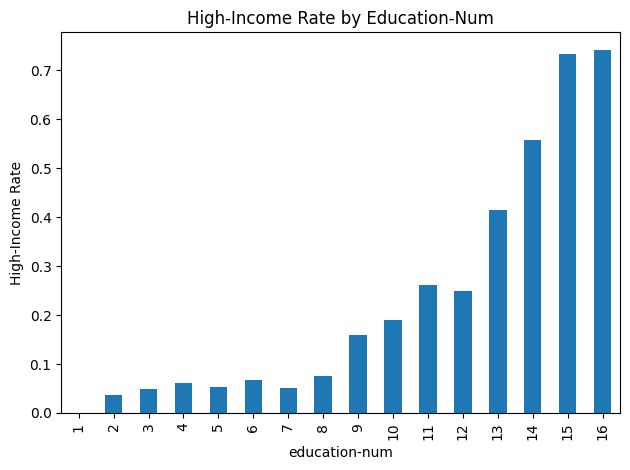

In [17]:
#High-income rate by education-num (ordered)
plt.figure()
edu_rate.plot(kind="bar", title="High-Income Rate by Education-Num")
plt.xlabel("education-num")
plt.ylabel("High-Income Rate")
plt.tight_layout()
plt.show()


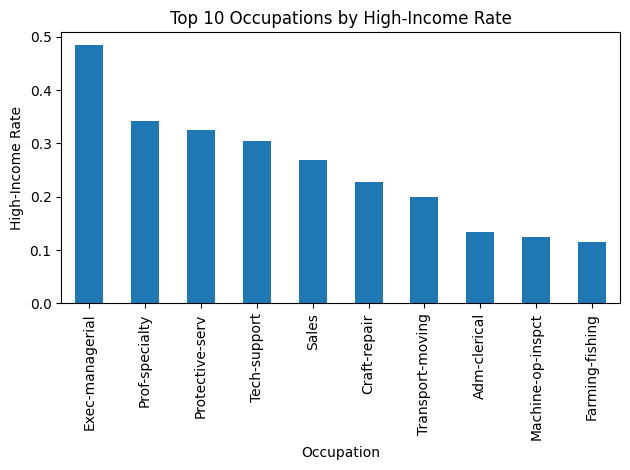

In [19]:
#Top 10 occupations by high-income rate (drop NaNs)
top_occ = occ_rate.dropna().head(10)
plt.figure()
top_occ.plot(kind="bar", title="Top 10 Occupations by High-Income Rate")
plt.xlabel("Occupation")
plt.ylabel("High-Income Rate")
plt.tight_layout()
plt.show()


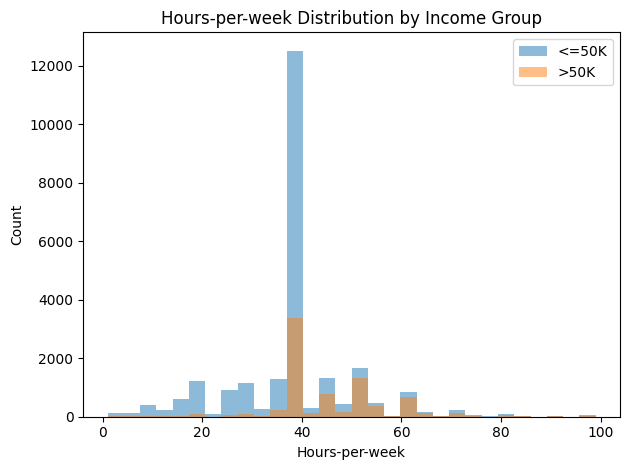

In [20]:
#Hours-per-week distribution by income group (simple overlaid histograms)
plt.figure()
for label, g in df_feat.groupby("income"):
    g["hours-per-week"].plot(kind="hist", alpha=0.5, bins=30, label=label)
plt.title("Hours-per-week Distribution by Income Group")
plt.xlabel("Hours-per-week")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
from scipy import stats

#H2: t-test on hours-per-week between <=50K and >50K
g0 = df_feat.loc[df_feat["high_income"] == 0, "hours-per-week"].dropna()
g1 = df_feat.loc[df_feat["high_income"] == 1, "hours-per-week"].dropna()

tstat, pval = stats.ttest_ind(g1, g0, equal_var=False)
print(f"H2 t-test (hours-per-week): t={tstat:.3f}, p={pval:.3g} (n>50K={len(g1)}, n<=50K={len(g0)})")


H2 t-test (hours-per-week): t=45.095, p=0 (n>50K=7839, n<=50K=24698)


In [22]:
#H3: Chi-square test of independence for marital-status vs high_income
ct_ms = pd.crosstab(df_feat["marital-status"], df_feat["high_income"])
chi2, p, dof, exp = stats.chi2_contingency(ct_ms)
print("H3 Chi-square (marital-status ~ high_income):")
print(f"chi2={chi2:.3f}, dof={dof}, p={p:.3g}")
ct_ms.head()


H3 Chi-square (marital-status ~ high_income):
chi2=6510.332, dof=6, p=0


high_income,0,1
marital-status,,
Divorced,3978,463
Married-AF-spouse,13,10
Married-civ-spouse,8280,6690
Married-spouse-absent,384,34
Never-married,10176,491


In [23]:
#H4: Chi-square test for occupation vs high_income
ct_occ = pd.crosstab(df_feat["occupation"], df_feat["high_income"])
chi2, p, dof, exp = stats.chi2_contingency(ct_occ)
print("H4 Chi-square (occupation ~ high_income):")
print(f"chi2={chi2:.3f}, dof={dof}, p={p:.3g}")
ct_occ.head()


H4 Chi-square (occupation ~ high_income):
chi2=3197.613, dof=13, p=0


high_income,0,1
occupation,,
Adm-clerical,3261,507
Armed-Forces,8,1
Craft-repair,3165,929
Exec-managerial,2097,1968
Farming-fishing,877,115


In [24]:
#H5: Chi-square for any capital gain vs high_income
ct_gain = pd.crosstab(df_feat["any_capital_gain"], df_feat["high_income"])
chi2, p, dof, exp = stats.chi2_contingency(ct_gain)
print("H5 Chi-square (any_capital_gain ~ high_income):")
print(f"chi2={chi2:.3f}, dof={dof}, p={p:.3g}")
ct_gain


H5 Chi-square (any_capital_gain ~ high_income):
chi2=2302.418, dof=1, p=0


high_income,0,1
any_capital_gain,,
0,23663,6162
1,1035,1677
